In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [11]:
HCD=pd.read_excel('1645792390_cep1_dataset (1).xlsx')

In [23]:
HCD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
HCD.shape

(303, 14)

In [12]:
HCD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
HCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
HCD.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
#Missing values:
HCD.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
HCD.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [32]:
HCD.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [28]:
#Duplicate values:
HCD.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [29]:
HCD[HCD.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [31]:
HCD[HCD.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [34]:
HCD.drop_duplicates(inplace=True)

In [35]:
HCD.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
HCD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
HCD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
HCD.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

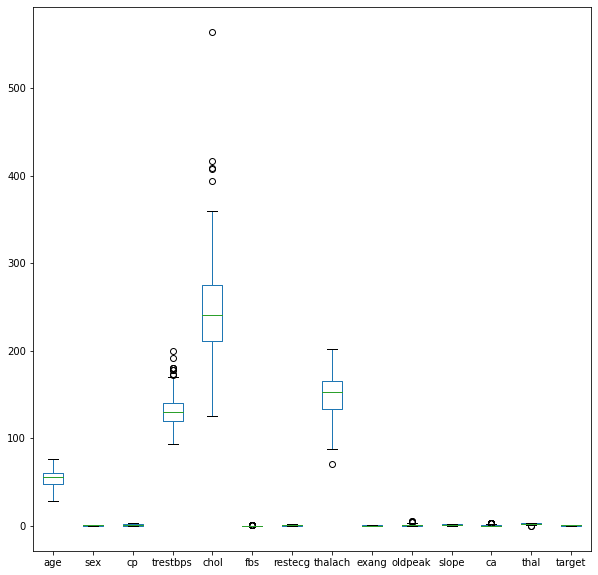

In [46]:
#Preliminarnay statistical summary box plot:
HCD.plot(kind='box',figsize=(10,10))

<AxesSubplot:ylabel='Frequency'>

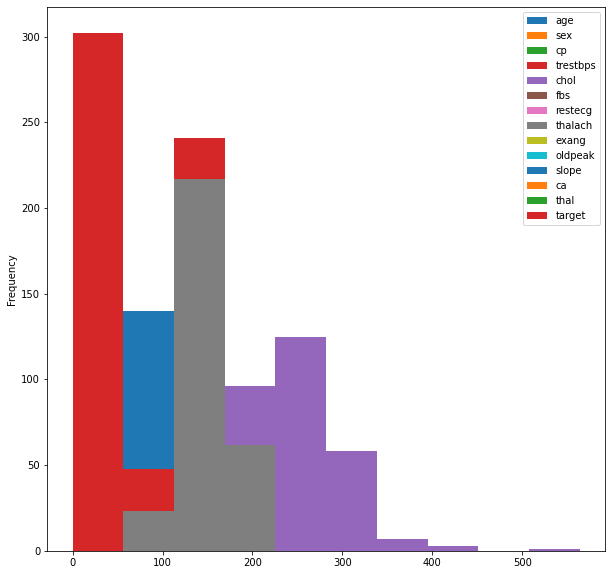

In [45]:
HCD.plot(kind='hist',figsize=(10,10))

#Catogorical data & count plot:

In [58]:
HCD['sex'].value_counts(normalize=True)*100

1    68.211921
0    31.788079
Name: sex, dtype: float64

<AxesSubplot:>

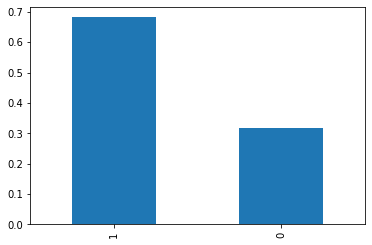

In [61]:
HCD['sex'].value_counts(normalize=True).plot(kind='bar')

#Accurance of CVD:

In [63]:
bins=[0,40,60,80,100]
labels=['0-40','40-60','60-80','80-100']
HCD['AgeCategory']=pd.cut(HCD['age'],bins=bins,labels=labels,right=False)

In [70]:
HCD.groupby(['AgeCategory','target']).count()['age'].to_frame()

age
AgeCategory target       
0-40        0         4.0
            1        11.0
40-60       0        82.0
            1       115.0
60-80       0        52.0
            1        38.0
80-100      0         NaN
            1         NaN

In [69]:
HCD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-80
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-60
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,40-60
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,40-60
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,60-80
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,40-60


#Composition with sex:

In [68]:
HCD.groupby(['sex','target']).count()['age'].to_frame()

age
sex target     
0   0        24
    1        72
1   0       114
    1        92

#Heart attacks based on blood pressure:

In [74]:
q1,q3=HCD['trestbps'].quantile([0.25,0.75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3-(1.5*iqr)

In [75]:
HCD[(HCD['trestbps']<lower_fence)|(HCD['trestbps']<upper_fence)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1,40-60
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1,40-60
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,40-60
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1,40-60
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1,40-60
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1,40-60
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1,40-60
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1,60-80
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1,40-60
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1,40-60


In [79]:
OUT=HCD[(HCD['trestbps']<lower_fence)|(HCD['trestbps']<upper_fence)]

In [78]:
OUT

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1,40-60
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1,40-60
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,40-60
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1,40-60
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1,40-60
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1,40-60
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1,40-60
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1,60-80
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1,40-60
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1,40-60


In [84]:
OUT=HCD[(HCD['trestbps']<lower_fence)|(HCD['trestbps']<upper_fence)][['trestbps','target']]

In [85]:
OUT

,trestbps,target
30,105,1
42,104,1
53,108,1
61,108,1
66,100,1
71,94,1
79,105,1
82,102,1
84,102,1
87,101,1


#Relationship between cholestrol level and target:

In [87]:
q1,q3=HCD['chol'].quantile([0.25,0.75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3-(1.5*iqr)

In [88]:
HCD[(HCD['chol']<lower_fence)|(HCD['chol']<upper_fence)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,40-60
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1,40-60
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,60-80
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1,40-60
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,40-60
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1,40-60
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,40-60
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1,60-80
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,60-80
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1,40-60


In [89]:
OUT1=HCD[(HCD['chol']<lower_fence)|(HCD['chol']<upper_fence)]

In [90]:
OUT1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,40-60
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1,40-60
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,60-80
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1,40-60
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,40-60
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1,40-60
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,40-60
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1,60-80
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,60-80
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1,40-60


In [95]:
OUT1=HCD[(HCD['chol']<lower_fence)|(HCD['chol']<upper_fence)][['chol','target']]

In [96]:
OUT1

,chol,target
9,168,1
27,175,1
31,177,1
35,177,1
53,141,1
94,160,1
111,126,1
136,178,1
151,149,1
162,157,1


#Relationship between peak excersise and heart attacks:

In [99]:
q1,q3=HCD['slope'].quantile([0.25,0.75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3-(1.5*iqr)

In [100]:
HCD[(HCD['slope']<lower_fence)|(HCD['slope']<upper_fence)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-80
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0-40
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1,60-80
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1,40-60
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1,40-60
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1,40-60
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,40-60
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1,40-60
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,40-60
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0,60-80


In [105]:
OUT2=HCD[(HCD['slope']<lower_fence)|(HCD['slope']<upper_fence)]

In [106]:
OUT2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-80
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0-40
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1,60-80
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1,40-60
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1,40-60
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1,40-60
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,40-60
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1,40-60
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,40-60
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0,60-80


In [127]:
OUT2=HCD[(HCD['slope']<lower_fence)|(HCD['slope']<upper_fence)][['slope','target']]

In [134]:
OUT2

,slope,target
0,0,1
1,0,1
17,0,1
29,0,1
33,0,1
35,0,1
101,0,1
103,0,1
160,0,1
167,0,0


#Thalassemia is a major cause of CVD:

#Other factors cause of CVD:

#Pair plot to understand the relationship between all the given variables:

In [131]:
import seaborn as sns

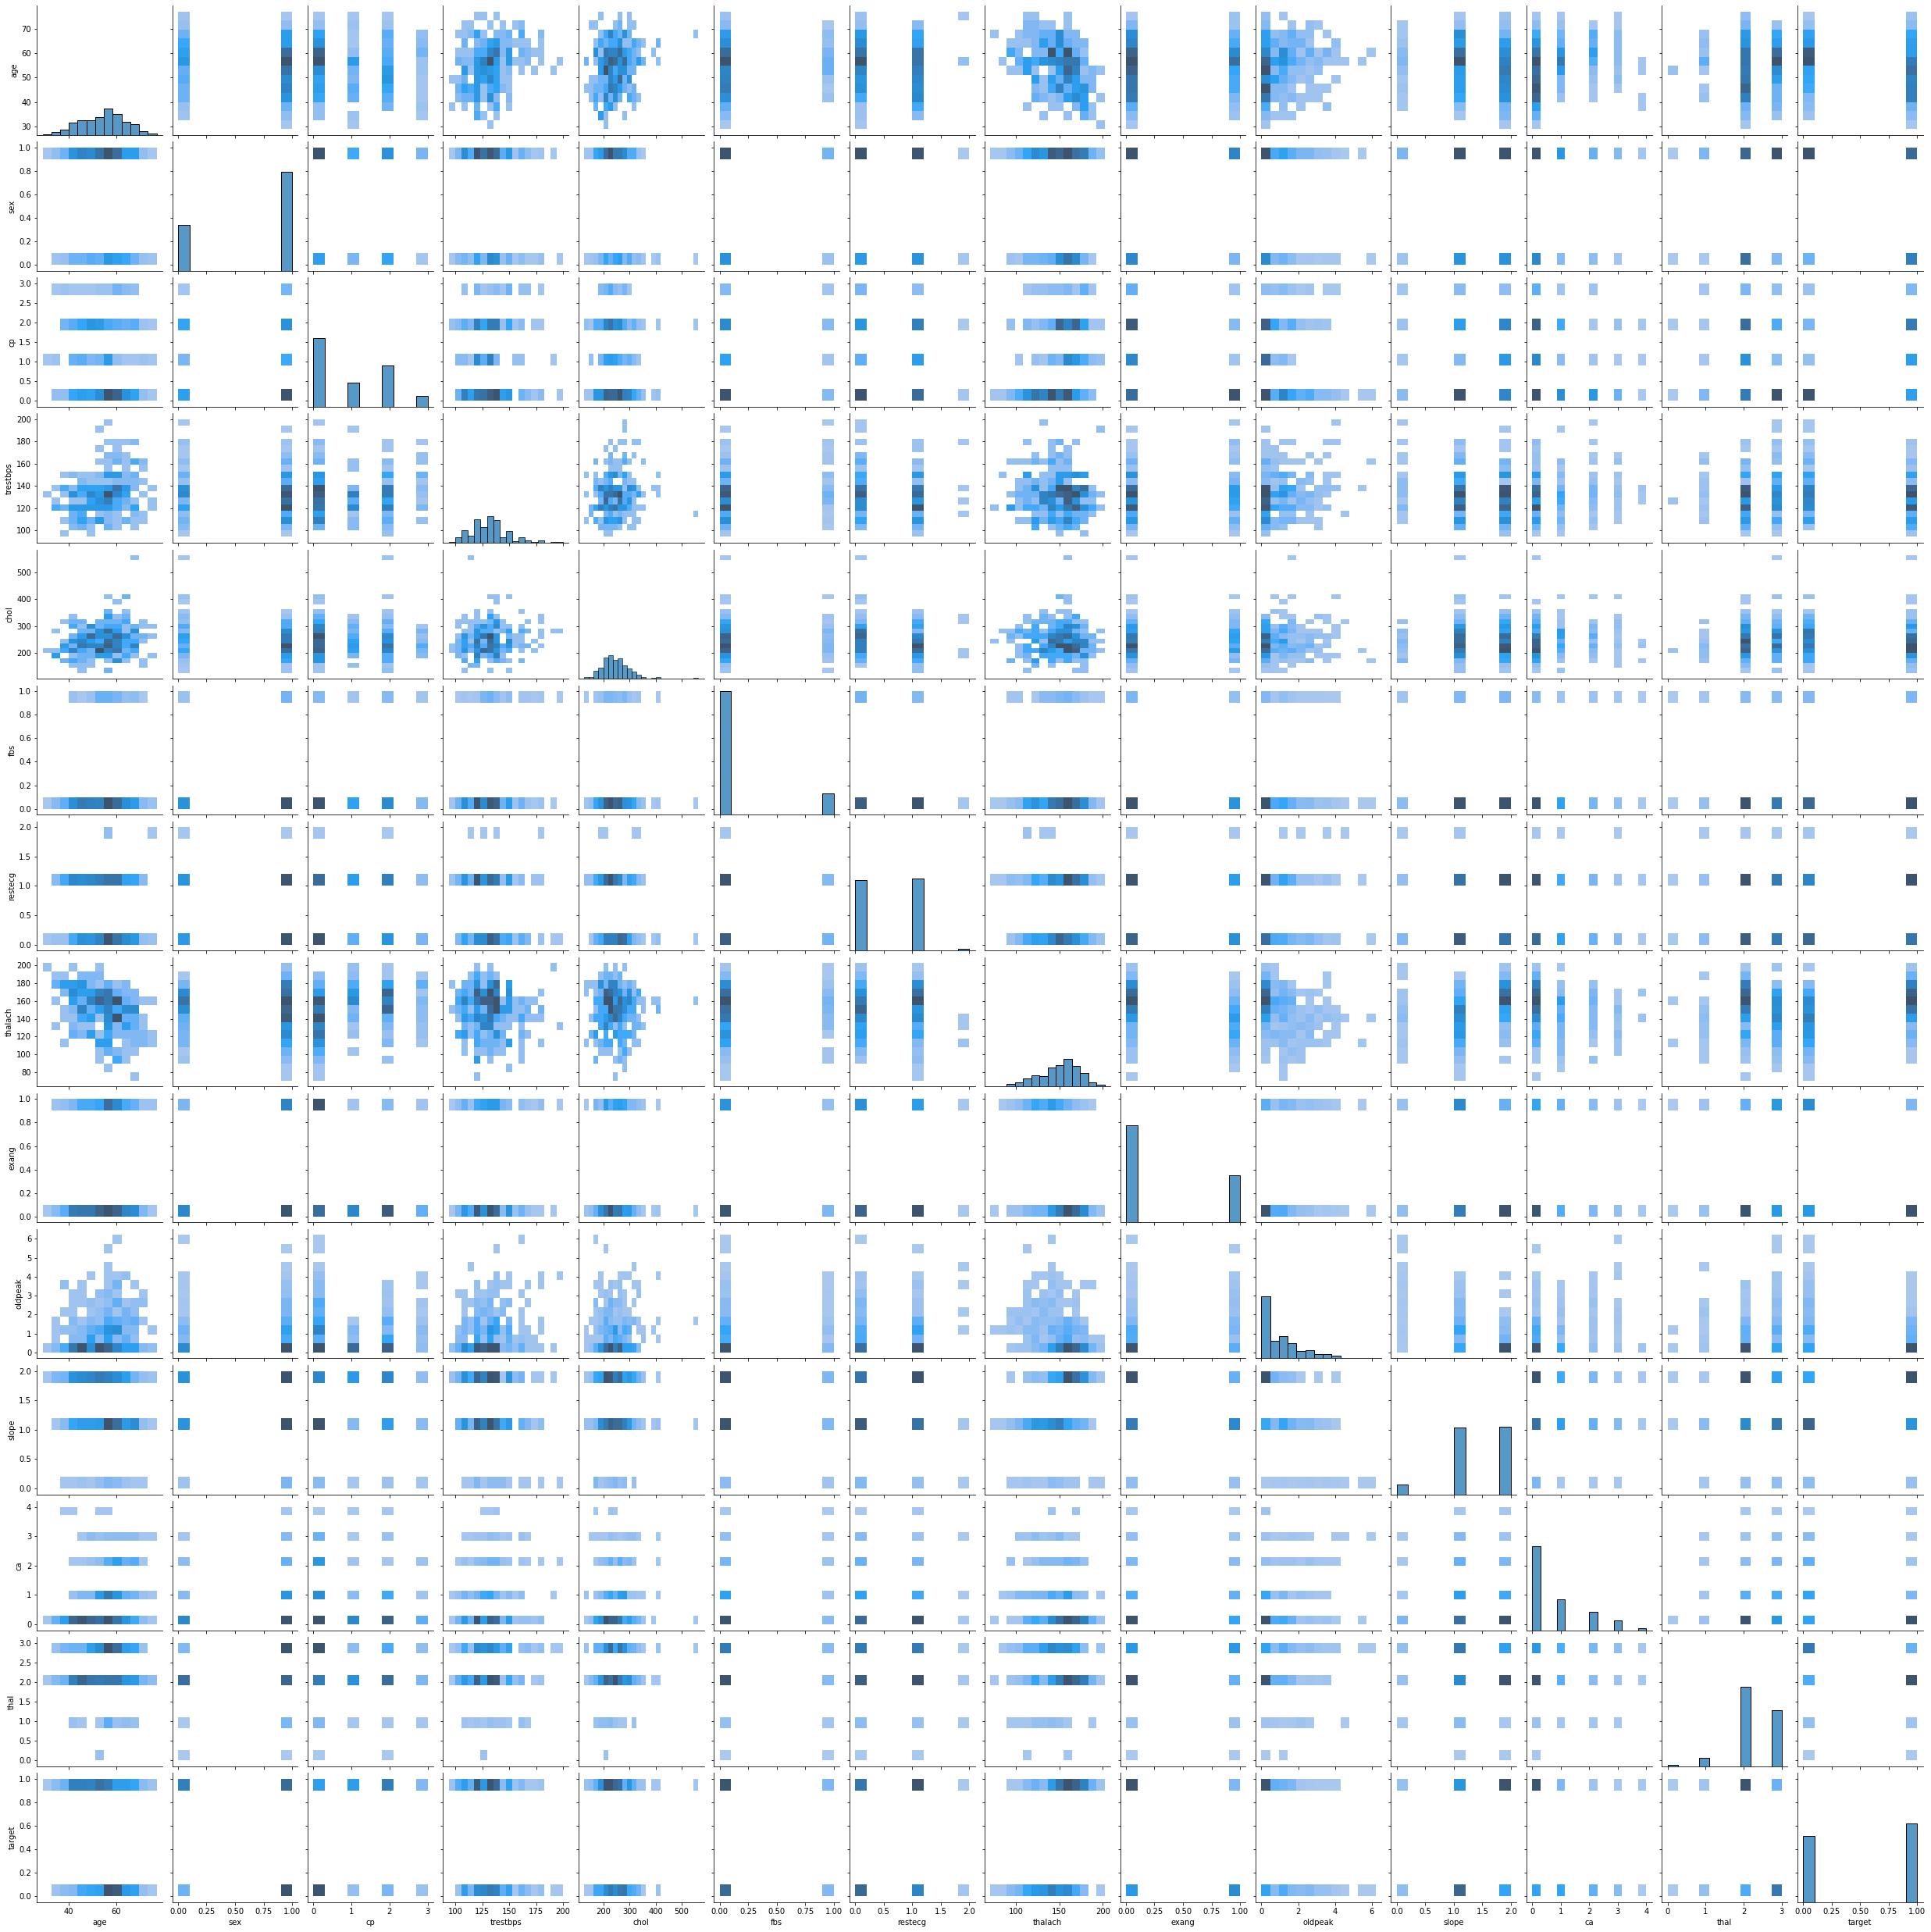

In [133]:
sns.pairplot(HCD,kind='hist')

#logistic regression:

In [154]:
HCD=pd.read_excel('1645792390_cep1_dataset (1).xlsx')

In [155]:
HCD.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [156]:
HCD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [169]:
HCD.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [170]:
HCD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [171]:
HCD['target'].value_counts(normalize = True) * 100

1    54.455446
0    45.544554
Name: target, dtype: float64

#Train test split:

In [172]:
X = HCD.drop('target',axis = 1)
y = HCD['target']

In [173]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [174]:
X_train.shape

(242, 13)

In [175]:
X_test.shape

(61, 13)

In [176]:
y_train.shape

(242,)

In [177]:
y_test.shape

(61,)

In [178]:
reg = LogisticRegression() 

In [179]:
reg.fit(X_train, y_train) 

LogisticRegression()

In [180]:
y_pred = reg.predict(X_test) 

In [181]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [182]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


In [183]:
pd.crosstab(y_test , y_pred)

col_0,0,1
target,,
0,25,4
1,3,29


In [184]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#Random Forest:

In [186]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(X_train, y_train);

In [187]:
X_train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2


In [188]:
y_train.head(3)

236    0
111    1
38     1
Name: target, dtype: int64

In [189]:
rfc_pred = rfc.predict(X_test)

In [190]:
print(confusion_matrix(y_test,rfc_pred))
pd.crosstab(y_test , rfc_pred)

[[25  4]
 [ 7 25]]


col_0,0,1
target,,
0,25,4
1,7,25


In [191]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [192]:
pd.DataFrame(rfc.feature_importances_ , index = X_train.columns).sort_values(0 , ascending = False)

,0
oldpeak,0.143255
thal,0.140686
cp,0.108090
ca,0.106753
thalach,0.098271
chol,0.088104
age,0.080782
trestbps,0.075724
slope,0.042230
sex,0.040950


In [193]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [194]:
param_grid = {'n_estimators': [100 ,150,250,350],
              'criterion': ['gini' , 'entropy'] ,
              'max_depth' : [3, 5 , 7,10 , 16] ,
              'min_samples_split' : [20 ,30 , 40 , 60]
             } 

In [195]:
grid = RandomizedSearchCV( rfc , param_grid , refit = True , verbose = 1, n_jobs = -1 , cv = 2)

grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 16],
                                        'min_samples_split': [20, 30, 40, 60],
                                        'n_estimators': [100, 150, 250, 350]},
                   verbose=1)

In [196]:
grid_predictions = grid.predict(X_test)

In [197]:
print(confusion_matrix(y_test,grid_predictions))

[[24  5]
 [ 3 29]]


In [198]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [199]:
grid.best_params_

{'n_estimators': 150,
 'min_samples_split': 40,
 'max_depth': 3,
 'criterion': 'entropy'}